#     Rainfall Weather Forecasting

## By :- JIGYASA SONI 

### BATCH DS2309

### Project Description


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


### Description of fnlwgt (final weight)


The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
    
  1.	A single cell estimate of the population 16+ for each state.

  2.	Controls for Hispanic Origin by age and sex.
    
  3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state


### Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
print('No of Rows',df.shape[0])
print('No of Columns' ,df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

No of Rows 8425
No of Columns 23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

### Comment:-
. Most of the  variable are Numerical in nature.

. MinTemp  and MaxTemp are Target Variable.

. This dataset contain 8425 Rows and 23 Columns.

### Statistical Analysis


Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [5]:
df.duplicated().sum()

1663

## Let check if any whitespace, 'NA' or '-' exist in dataset.

In [6]:
df.isin([' ','NA','-']).sum().any()

False

### Comment:-
    
. There are 1663 Duplicate entry in dataset.

. No whitespace, NA, '-' exist in dataset.

## Missing value check

In [7]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3994       47.406528
Evaporation              3512       41.685460
Cloud3pm                 2455       29.139466
Cloud9am                 2421       28.735905
Pressure3pm              1312       15.572700
Pressure9am              1309       15.537092
WindGustDir               991       11.762611
WindGustSpeed             991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
RainToday                 240        2.848665
Rainfall                  240        2.848665
RainTomorrow              239        2.836795
WindSpeed3pm              107        1.270030
Humidity3pm               102        1.210682
Temp3pm                    96        1.139466
WindSpeed9am               76        0.902077
MinTemp                    75        0.890208
MaxTemp                    60        0.712166
Humidity9am                59        0.700297
Temp9am                    56     

### As missing values present are more than 45%. So We can directly drop these missing values.

In [8]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 8425 Rows and 23 Columns before dropping null values.
We have 3790 Rows and 23 Columns after dropping null values.


### Comment :-
    
    
Finally , There is no missing values present in the dataset.¶

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
907,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,ESE,17.0,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,10,3,2009
908,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,S,17.0,13.0,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,11,3,2009
909,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,ESE,6.0,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,3,2009
910,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,ENE,7.0,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No,13,3,2009
911,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,NE,13.0,35.0,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,3,2009


In [11]:
pip install reverse_geocoder

In [12]:
import reverse_geocoder as rg
import pprint

In [14]:
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(df['MinTemp'], df['MaxTemp']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
geo_names = pd.DataFrame(geodata).transpose()

Loading formatted geocoded file...


### We have gather state and city name as per corresponding to it's MinTemp and MaxTemp available. Now it is time incorporate state and city columns in our dataset.

In [15]:
df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
df['City']=geo_names[0].apply(lambda x:x.get('name'))

In [16]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,State,City
907,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,ESE,17.0,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,10,3,2009,Biltine,Iriba
908,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,S,17.0,13.0,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,11,3,2009,Chari-Baguirmi,Ngama
909,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,ESE,6.0,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,3,2009,Guera,Melfi
910,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,ENE,7.0,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No,13,3,2009,Batha,Ati
911,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,NE,13.0,35.0,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,3,2009,Batha,Ati


In [17]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,3790,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,2011-10-06 17:04:43.060686080,14.071029,24.733483,2.451768,5.292533,7.852744,41.203958,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201,15.798681,6.446438,2011.270449
min,2009-03-10 00:00:00,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000,1.000000,1.000000,2009.000000
25%,2010-07-06 00:00:00,10.200000,20.300000,0.000000,2.800000,5.200000,31.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000,8.000000,3.000000,2010.000000
50%,2011-08-15 00:00:00,14.000000,24.100000,0.000000,4.600000,8.900000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000,16.000000,6.000000,2011.000000
75%,2012-07-25 00:00:00,17.900000,29.200000,0.800000,7.000000,10.800000,50.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000,23.000000,9.000000,2012.000000
max,2016-04-26 00:00:00,28.500000,43.600000,168.400000,37.000000,13.900000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000,31.000000,12.000000,2016.000000
std,NaN,5.161176,6.068364,7.772025,3.642341,3.816696,13.857829,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694,8.832828,3.436589,1.607894


## Start Exploring Present Temperature

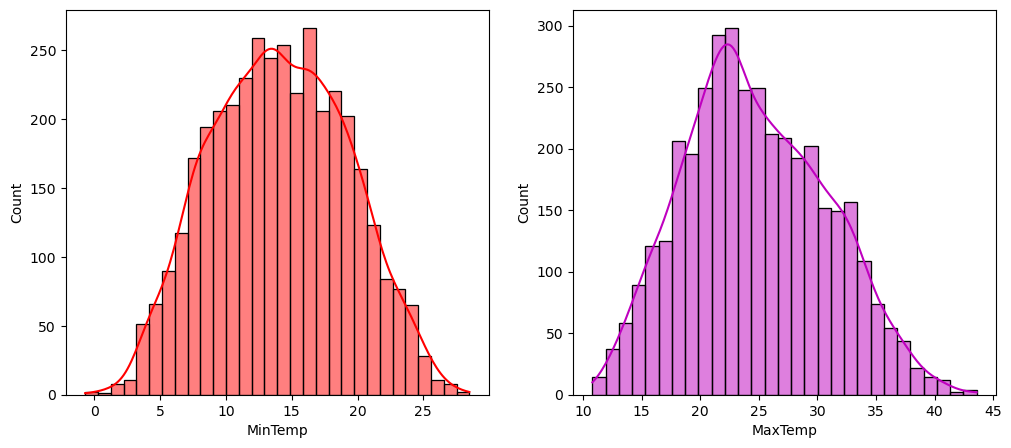

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['MinTemp'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['MaxTemp'],kde=True,color='m')
plt.show()

### Comment:-
. For majority of reading Present Temperature Maximum varies in between 20 to 25 degree.

. For majority of reading Present Temperature Minimum varies in between 112 to 18 degree

In [26]:
print('Present Maximum Temperature Maxima in year 2009-2024 :',df.MaxTemp.max())
print('Present Maximum Temperature Minima in year 2009-2024 :',df.MaxTemp.min())
print(' Average Present Maximum Temperature in year 2009-2024 :',df.MaxTemp.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2009-2024 :',df.MinTemp.max())
print('Present Minimum Temperature Minima in year 2009-2024 :',df.MinTemp.min())
print('Average Present Minimum Temperature in year 2009-2024 :',df.MinTemp.mean())

Present Maximum Temperature Maxima in year 2009-2024 : 43.6
Present Maximum Temperature Minima in year 2009-2024 : 10.8
 Average Present Maximum Temperature in year 2009-2024 : 24.73348284960422
Present Minimum Temperature Maxima in year 2009-2024 : 28.5
Present Minimum Temperature Minima in year 2009-2024 : -0.7
Average Present Minimum Temperature in year 2009-2024 : 14.071029023746702


### Checking where actually these minima and maxima occur

In [27]:
pd.set_option('display.max_columns', None)
df.loc[df.Rainfall==df.Rainfall.max()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,State,City
6489,2012-01-25,Brisbane,21.3,26.6,168.4,2.6,0.7,NE,26.0,S,NE,2.0,6.0,98.0,88.0,1008.5,1005.8,8.0,8.0,23.3,24.6,Yes,Yes,25,1,2012,NaN,NaN


### Observation :-
    Shows the maximum rainfall column 

In [28]:
df.loc[df.Rainfall==df.Rainfall.min()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,State,City
910,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,ENE,7.0,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No,13,3,2009,Batha,Ati
911,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,NE,13.0,35.0,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,3,2009,Batha,Ati
915,2009-03-18,CoffsHarbour,19.7,25.9,0.0,4.4,6.4,SW,30.0,SW,S,17.0,19.0,73.0,64.0,1017.9,1016.5,6.0,5.0,21.2,24.6,No,No,18,3,2009,Northern Darfur,Umm Kaddadah
916,2009-03-19,CoffsHarbour,17.7,26.7,0.0,4.0,6.0,NNE,31.0,WNW,NE,11.0,24.0,76.0,66.0,1017.2,1015.0,5.0,5.0,23.2,25.1,No,No,19,3,2009,Northern Darfur,Umm Kaddadah
917,2009-03-20,CoffsHarbour,16.3,26.8,0.0,2.2,9.4,SSE,22.0,SW,SE,11.0,15.0,77.0,69.0,1016.9,1015.3,3.0,5.0,22.3,26.1,No,No,20,3,2009,Northern State,Ad Dabbah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,2012-11-04,Darwin,25.4,33.3,0.0,4.0,9.1,S,52.0,S,WNW,13.0,30.0,76.0,68.0,1010.6,1006.2,6.0,4.0,29.8,32.4,No,No,4,11,2012,NaN,NaN
8380,2012-11-05,Darwin,25.8,32.9,0.0,7.6,6.7,N,31.0,N,NNW,9.0,19.0,70.0,65.0,1010.2,1006.7,5.0,2.0,30.7,32.0,No,Yes,5,11,2012,NaN,NaN
8382,2012-11-07,Darwin,26.2,33.3,0.0,6.0,5.9,N,54.0,ENE,E,13.0,13.0,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,No,Yes,7,11,2012,NaN,NaN
8384,2012-11-09,Darwin,25.5,33.1,0.0,4.8,7.1,SSE,37.0,E,WSW,20.0,13.0,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,No,No,9,11,2012,NaN,NaN


### Observation :-
    Shows that there are 2565 rows and 28 columns which having min. rainfall

In [29]:
df.loc[df.RainToday==df.RainToday.max()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,State,City
907,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,ESE,17.0,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,10,3,2009,Biltine,Iriba
908,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,S,17.0,13.0,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,11,3,2009,Chari-Baguirmi,Ngama
909,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,ESE,6.0,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,3,2009,Guera,Melfi
912,2009-03-15,CoffsHarbour,20.1,29.4,3.2,3.8,7.1,NNE,46.0,NNW,NNE,13.0,31.0,90.0,68.0,1012.9,1008.5,6.0,2.0,22.0,27.2,Yes,No,15,3,2009,Batha,Oum Hadjer
914,2009-03-17,CoffsHarbour,16.4,25.2,1.4,1.6,6.7,S,33.0,WSW,S,9.0,20.0,82.0,65.0,1012.0,1011.2,6.0,4.0,21.4,23.9,Yes,No,17,3,2009,Northern Darfur,Umm Kaddadah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,2012-10-28,Darwin,22.9,32.8,5.8,7.4,4.4,N,57.0,N,NNW,13.0,9.0,96.0,61.0,1012.1,1007.4,8.0,5.0,23.4,32.0,Yes,Yes,28,10,2012,NaN,NaN
8373,2012-10-29,Darwin,23.3,34.2,3.2,5.0,10.2,ENE,35.0,NE,NNW,6.0,19.0,60.0,56.0,1011.1,1007.0,3.0,2.0,29.9,32.0,Yes,No,29,10,2012,NaN,NaN
8378,2012-11-03,Darwin,23.2,33.4,31.6,13.0,6.9,SE,48.0,ESE,WNW,9.0,17.0,88.0,58.0,1010.3,1007.0,7.0,2.0,26.0,32.3,Yes,No,3,11,2012,NaN,NaN
8381,2012-11-06,Darwin,25.2,34.5,3.0,4.0,9.2,NNE,39.0,N,NNE,11.0,22.0,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,Yes,No,6,11,2012,NaN,NaN


### Observation :- 
    shows that there are 889 rows and 28 columns present which shows that there are max. chances of  rain is having today.

In [31]:
df.loc[df.RainTomorrow==df.RainTomorrow.min()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,State,City
909,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,ESE,6.0,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,3,2009,Guera,Melfi
910,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,ENE,7.0,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No,13,3,2009,Batha,Ati
912,2009-03-15,CoffsHarbour,20.1,29.4,3.2,3.8,7.1,NNE,46.0,NNW,NNE,13.0,31.0,90.0,68.0,1012.9,1008.5,6.0,2.0,22.0,27.2,Yes,No,15,3,2009,Batha,Oum Hadjer
914,2009-03-17,CoffsHarbour,16.4,25.2,1.4,1.6,6.7,S,33.0,WSW,S,9.0,20.0,82.0,65.0,1012.0,1011.2,6.0,4.0,21.4,23.9,Yes,No,17,3,2009,Northern Darfur,Umm Kaddadah
915,2009-03-18,CoffsHarbour,19.7,25.9,0.0,4.4,6.4,SW,30.0,SW,S,17.0,19.0,73.0,64.0,1017.9,1016.5,6.0,5.0,21.2,24.6,No,No,18,3,2009,Northern Darfur,Umm Kaddadah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,2012-11-04,Darwin,25.4,33.3,0.0,4.0,9.1,S,52.0,S,WNW,13.0,30.0,76.0,68.0,1010.6,1006.2,6.0,4.0,29.8,32.4,No,No,4,11,2012,NaN,NaN
8381,2012-11-06,Darwin,25.2,34.5,3.0,4.0,9.2,NNE,39.0,N,NNE,11.0,22.0,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,Yes,No,6,11,2012,NaN,NaN
8383,2012-11-08,Darwin,24.9,32.8,20.4,6.2,8.7,WNW,37.0,NNE,NW,13.0,20.0,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,Yes,No,8,11,2012,NaN,NaN
8384,2012-11-09,Darwin,25.5,33.1,0.0,4.8,7.1,SSE,37.0,E,WSW,20.0,13.0,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,No,No,9,11,2012,NaN,NaN


### Observation :-
shows that there are 2901 rows and 28 columns present which shows that there are min. chances of  rain is having tomorrow.

### Let Visualise & gain insight over this by plotting line plot over all Weather.

## Line Plot of Present Maximum Rainfall over each Day

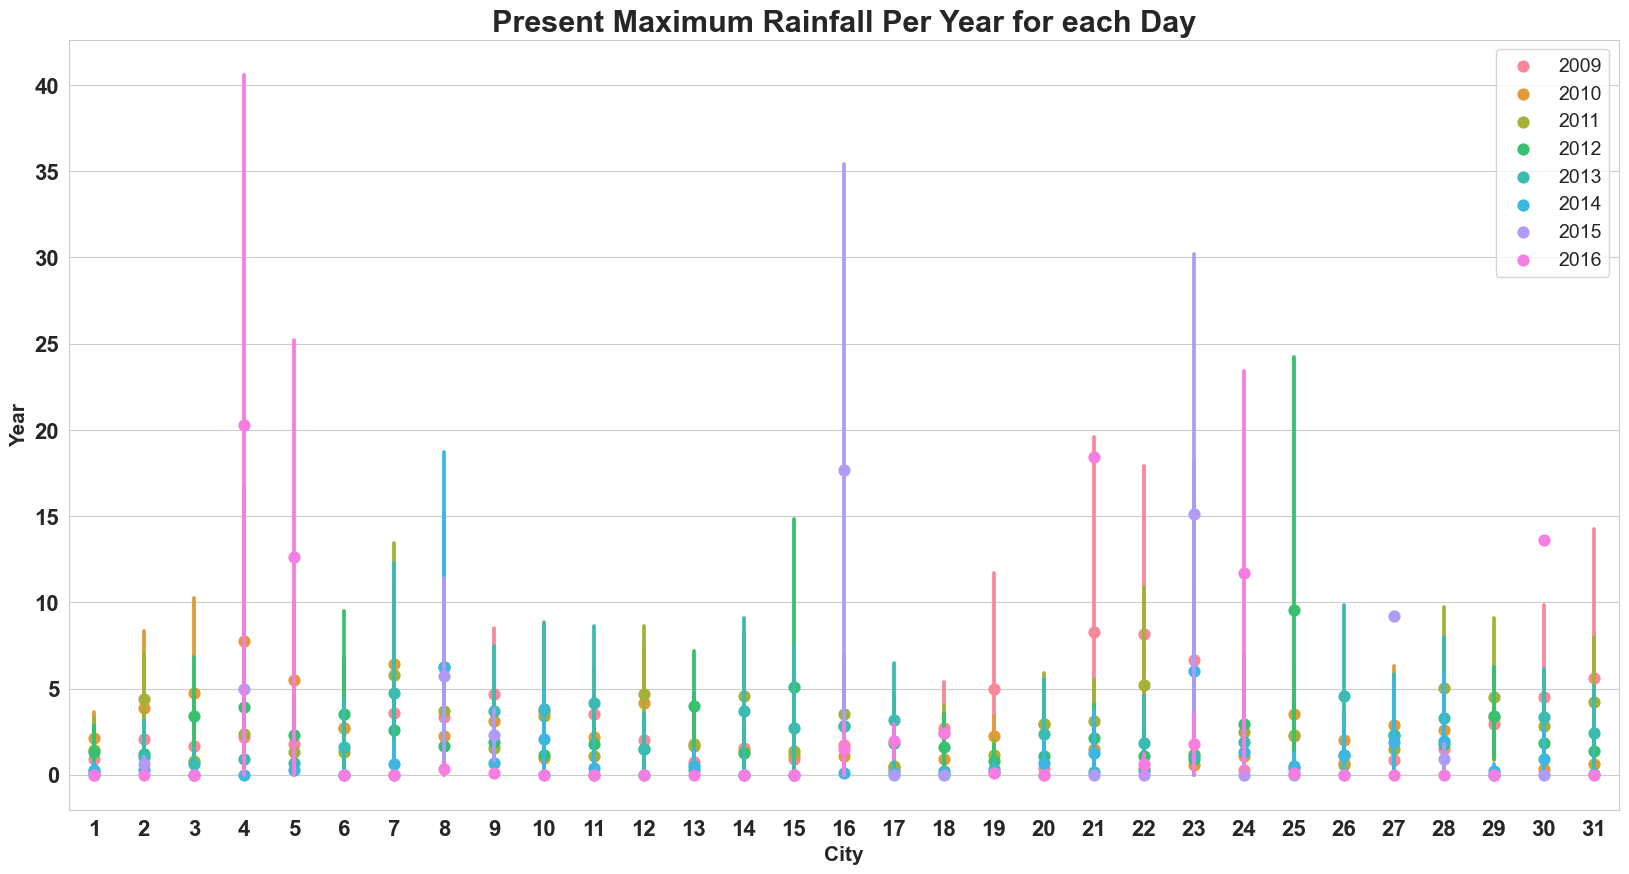

In [78]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='Day', y='Rainfall', data=df, hue='Year',join=False)
plt.title('Present Maximum Rainfall Per Year for each Day', fontsize=22, fontweight='bold')
plt.xlabel('City',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Year',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

<Axes: xlabel='Month', ylabel='Day'>

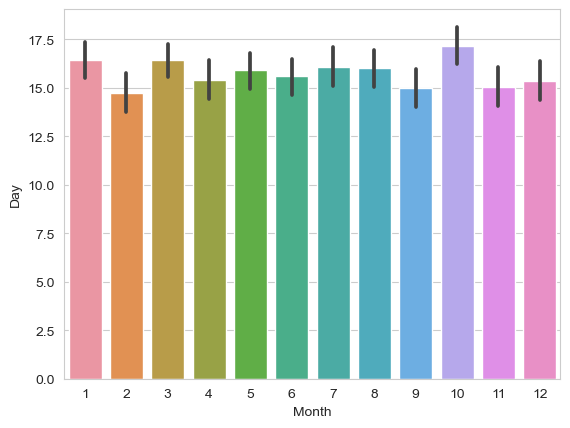

In [36]:
sns.barplot(x=df['Month'], y=df['Day'])

<Axes: xlabel='WindGustDir', ylabel='WindGustSpeed'>

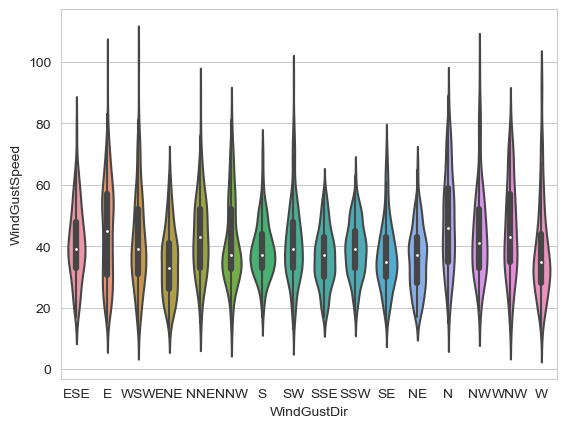

In [37]:
sns.violinplot(x=df['WindGustDir'], y=df['WindGustSpeed'])

## Exploration of Target Variable

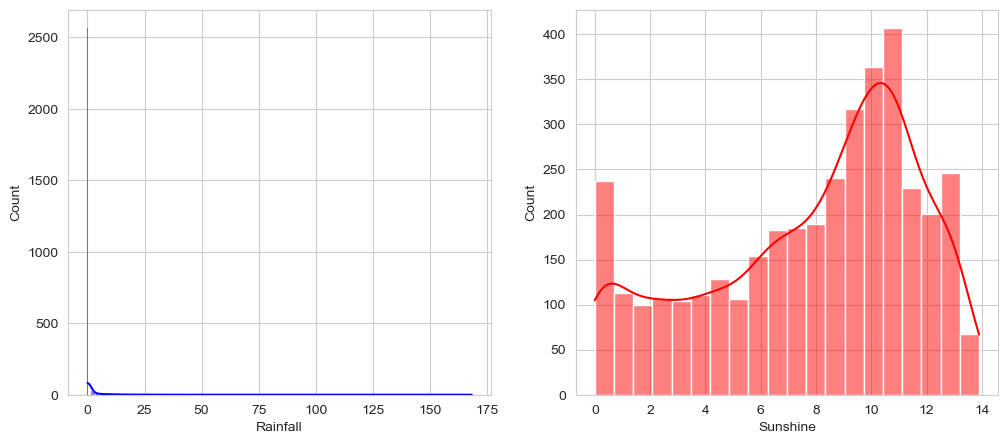

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Rainfall'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Sunshine'],kde=True,color='r')
plt.show()

### Comment :-
    
As we can clearly see there is a big difference shown between the rainfall and the sunshine 

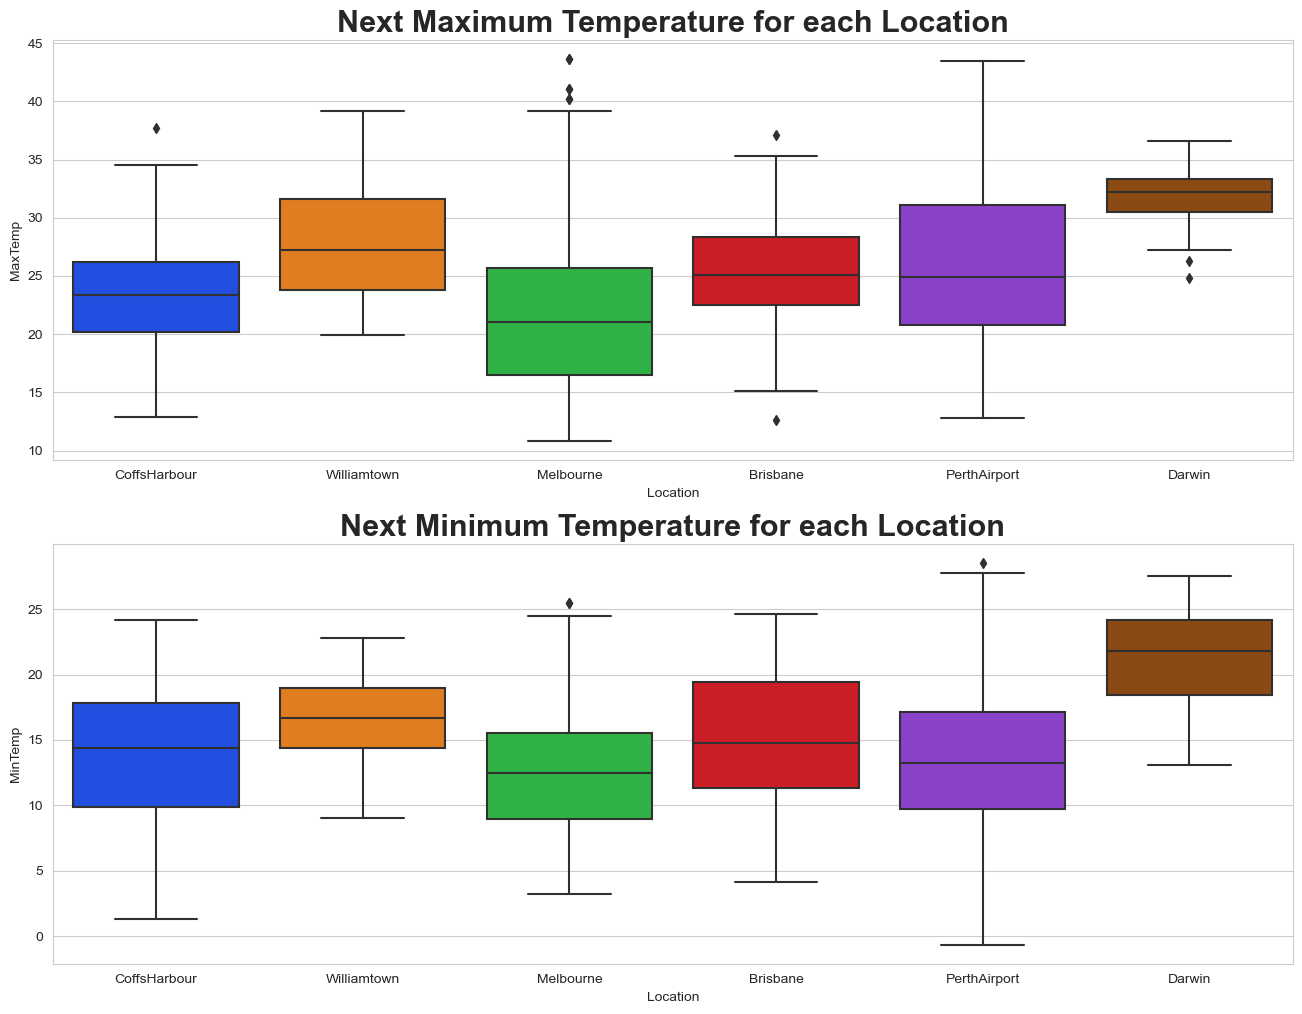

In [40]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(x=df['Location'],y=df['MaxTemp'],palette="bright")
plt.title('Next Maximum Temperature for each Location', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(x=df['Location'],y=df['MinTemp'],palette="bright")
plt.title('Next Minimum Temperature for each Location', fontsize=22, fontweight='bold')
plt.show()

### Observation :-
From the box plot

. we can notice the station 45 has highest temperature in Melbourne

. And Minimum Temperature shows between 0 to 5 in CoffsHarbour

## Humidity v/s Clouds

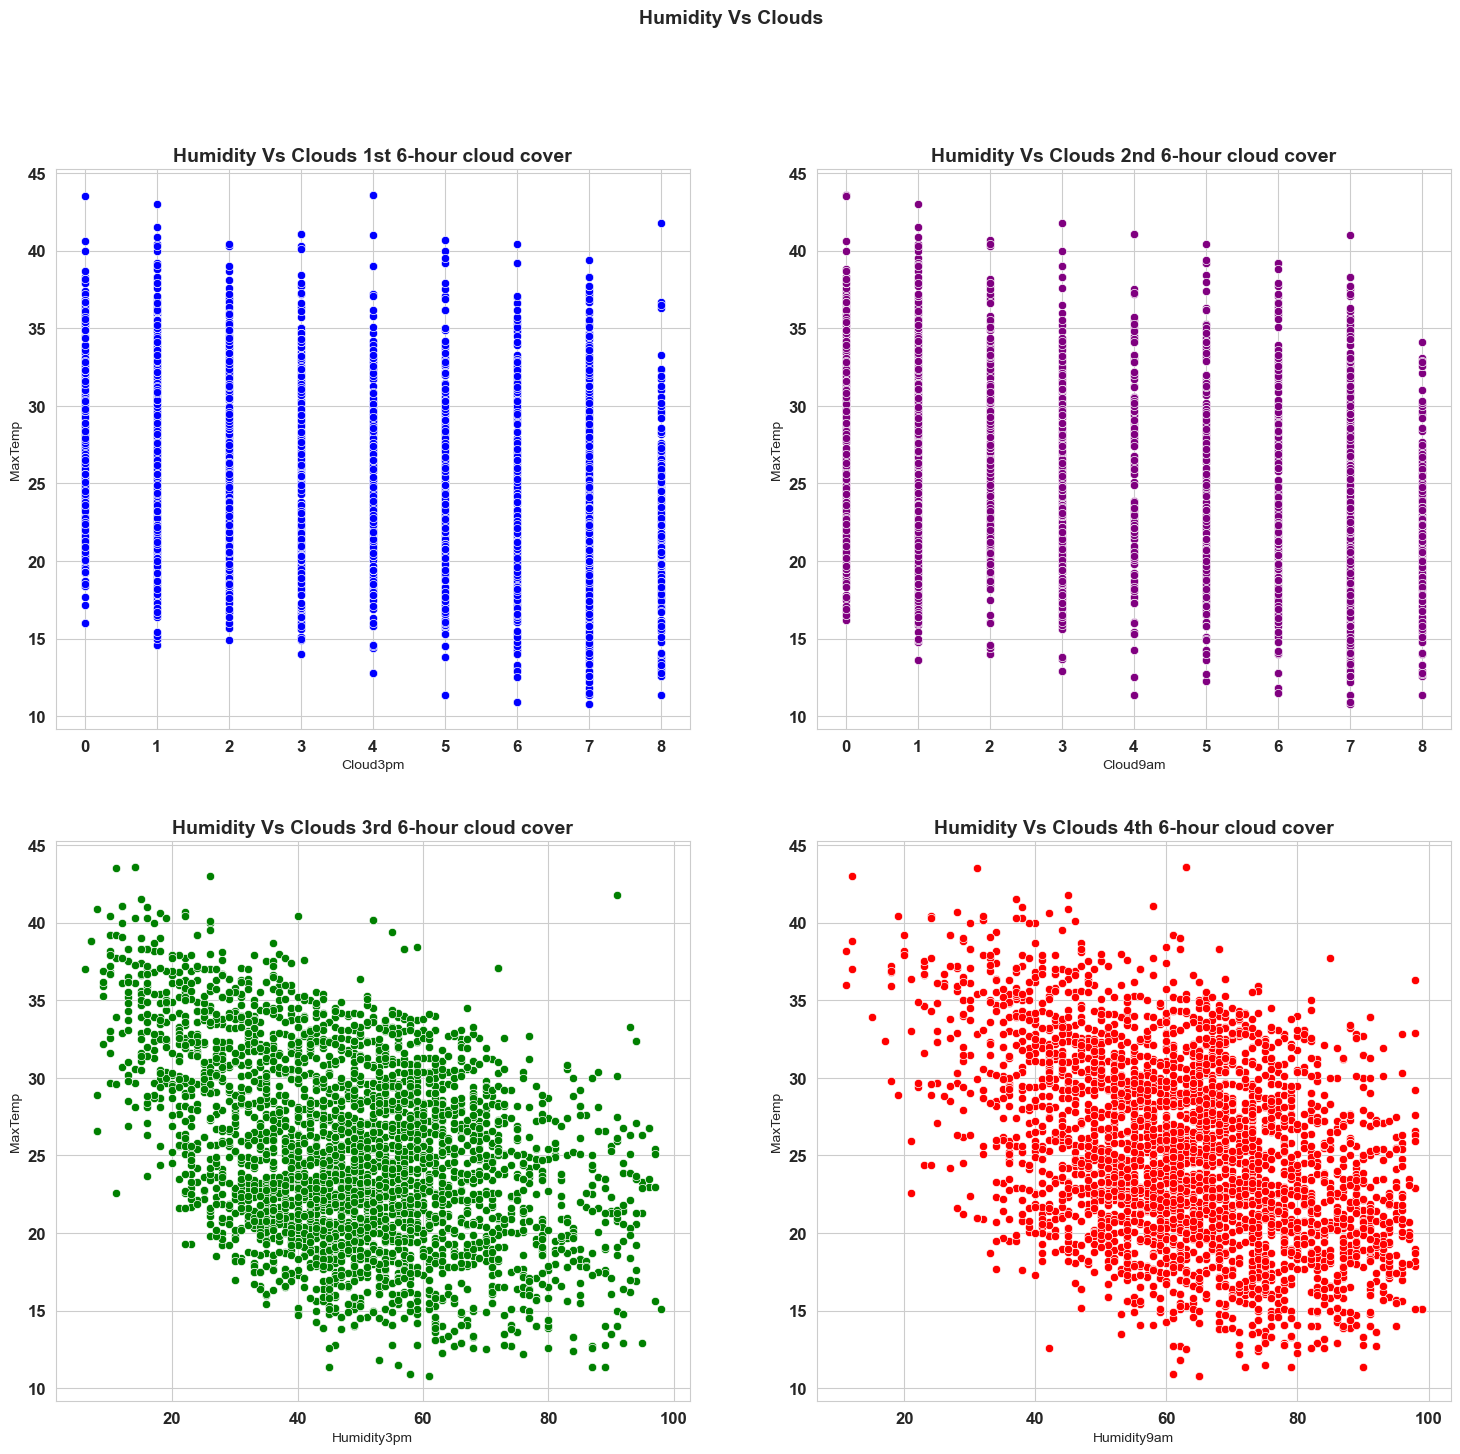

In [44]:
plt.figure(figsize=(18,16))
plt.suptitle('Humidity Vs Clouds',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Humidity Vs Clouds 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='Cloud3pm',y='MaxTemp',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Humidity Vs Clouds 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='Cloud9am',y='MaxTemp',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Humidity Vs Clouds 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='Humidity3pm',y='MaxTemp',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Humidity Vs Clouds 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='Humidity9am',y='MaxTemp',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

### Observation :-
    
    Irrespective of 6 hr quarter in 24 hr day time, and night time shows the humidity and clouds cover.

### Encoding categorical data

In [45]:
df.columns.to_series().groupby(df.dtypes).groups

{datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year'], float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'State', 'City']}

In [46]:
Category = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,State,City
907,2009-03-10,CoffsHarbour,19.8,27.1,24.4,8.6,9.0,ESE,35.0,SW,ESE,17.0,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,10,3,2009,13,73
908,2009-03-11,CoffsHarbour,18.7,25.6,6.8,3.8,3.4,E,33.0,SW,S,17.0,13.0,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,11,3,2009,18,109
909,2009-03-12,CoffsHarbour,16.5,25.5,16.8,2.8,6.1,WSW,19.0,WSW,ESE,6.0,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,3,2009,28,102
910,2009-03-13,CoffsHarbour,18.5,26.9,0.0,3.2,11.0,ENE,30.0,SW,ENE,7.0,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No,13,3,2009,12,18
911,2009-03-14,CoffsHarbour,18.2,28.2,0.0,6.8,9.0,NNE,50.0,NNW,NE,13.0,35.0,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,3,2009,12,18


In [47]:
df.drop(['Date'], axis=1, inplace=True)

## Feature selection and Engineering

### 1. Outliers Detection and Removal

In [48]:
df.shape

(3790, 27)

In [50]:
print(df.columns)


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year', 'State',
       'City'],
      dtype='object')


In [51]:
print(df.head())  
print(df.shape)   


         Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
907  CoffsHarbour     19.8     27.1      24.4          8.6       9.0   
908  CoffsHarbour     18.7     25.6       6.8          3.8       3.4   
909  CoffsHarbour     16.5     25.5      16.8          2.8       6.1   
910  CoffsHarbour     18.5     26.9       0.0          3.2      11.0   
911  CoffsHarbour     18.2     28.2       0.0          6.8       9.0   

    WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
907         ESE           35.0         SW        ESE          17.0   
908           E           33.0         SW          S          17.0   
909         WSW           19.0        WSW        ESE           6.0   
910         ENE           30.0         SW        ENE           7.0   
911         NNE           50.0        NNW         NE          13.0   

     WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
907          22.0         83.0         60.0       1018.9       1017.9   


In [52]:
print(df[column].isnull().sum()) 


0


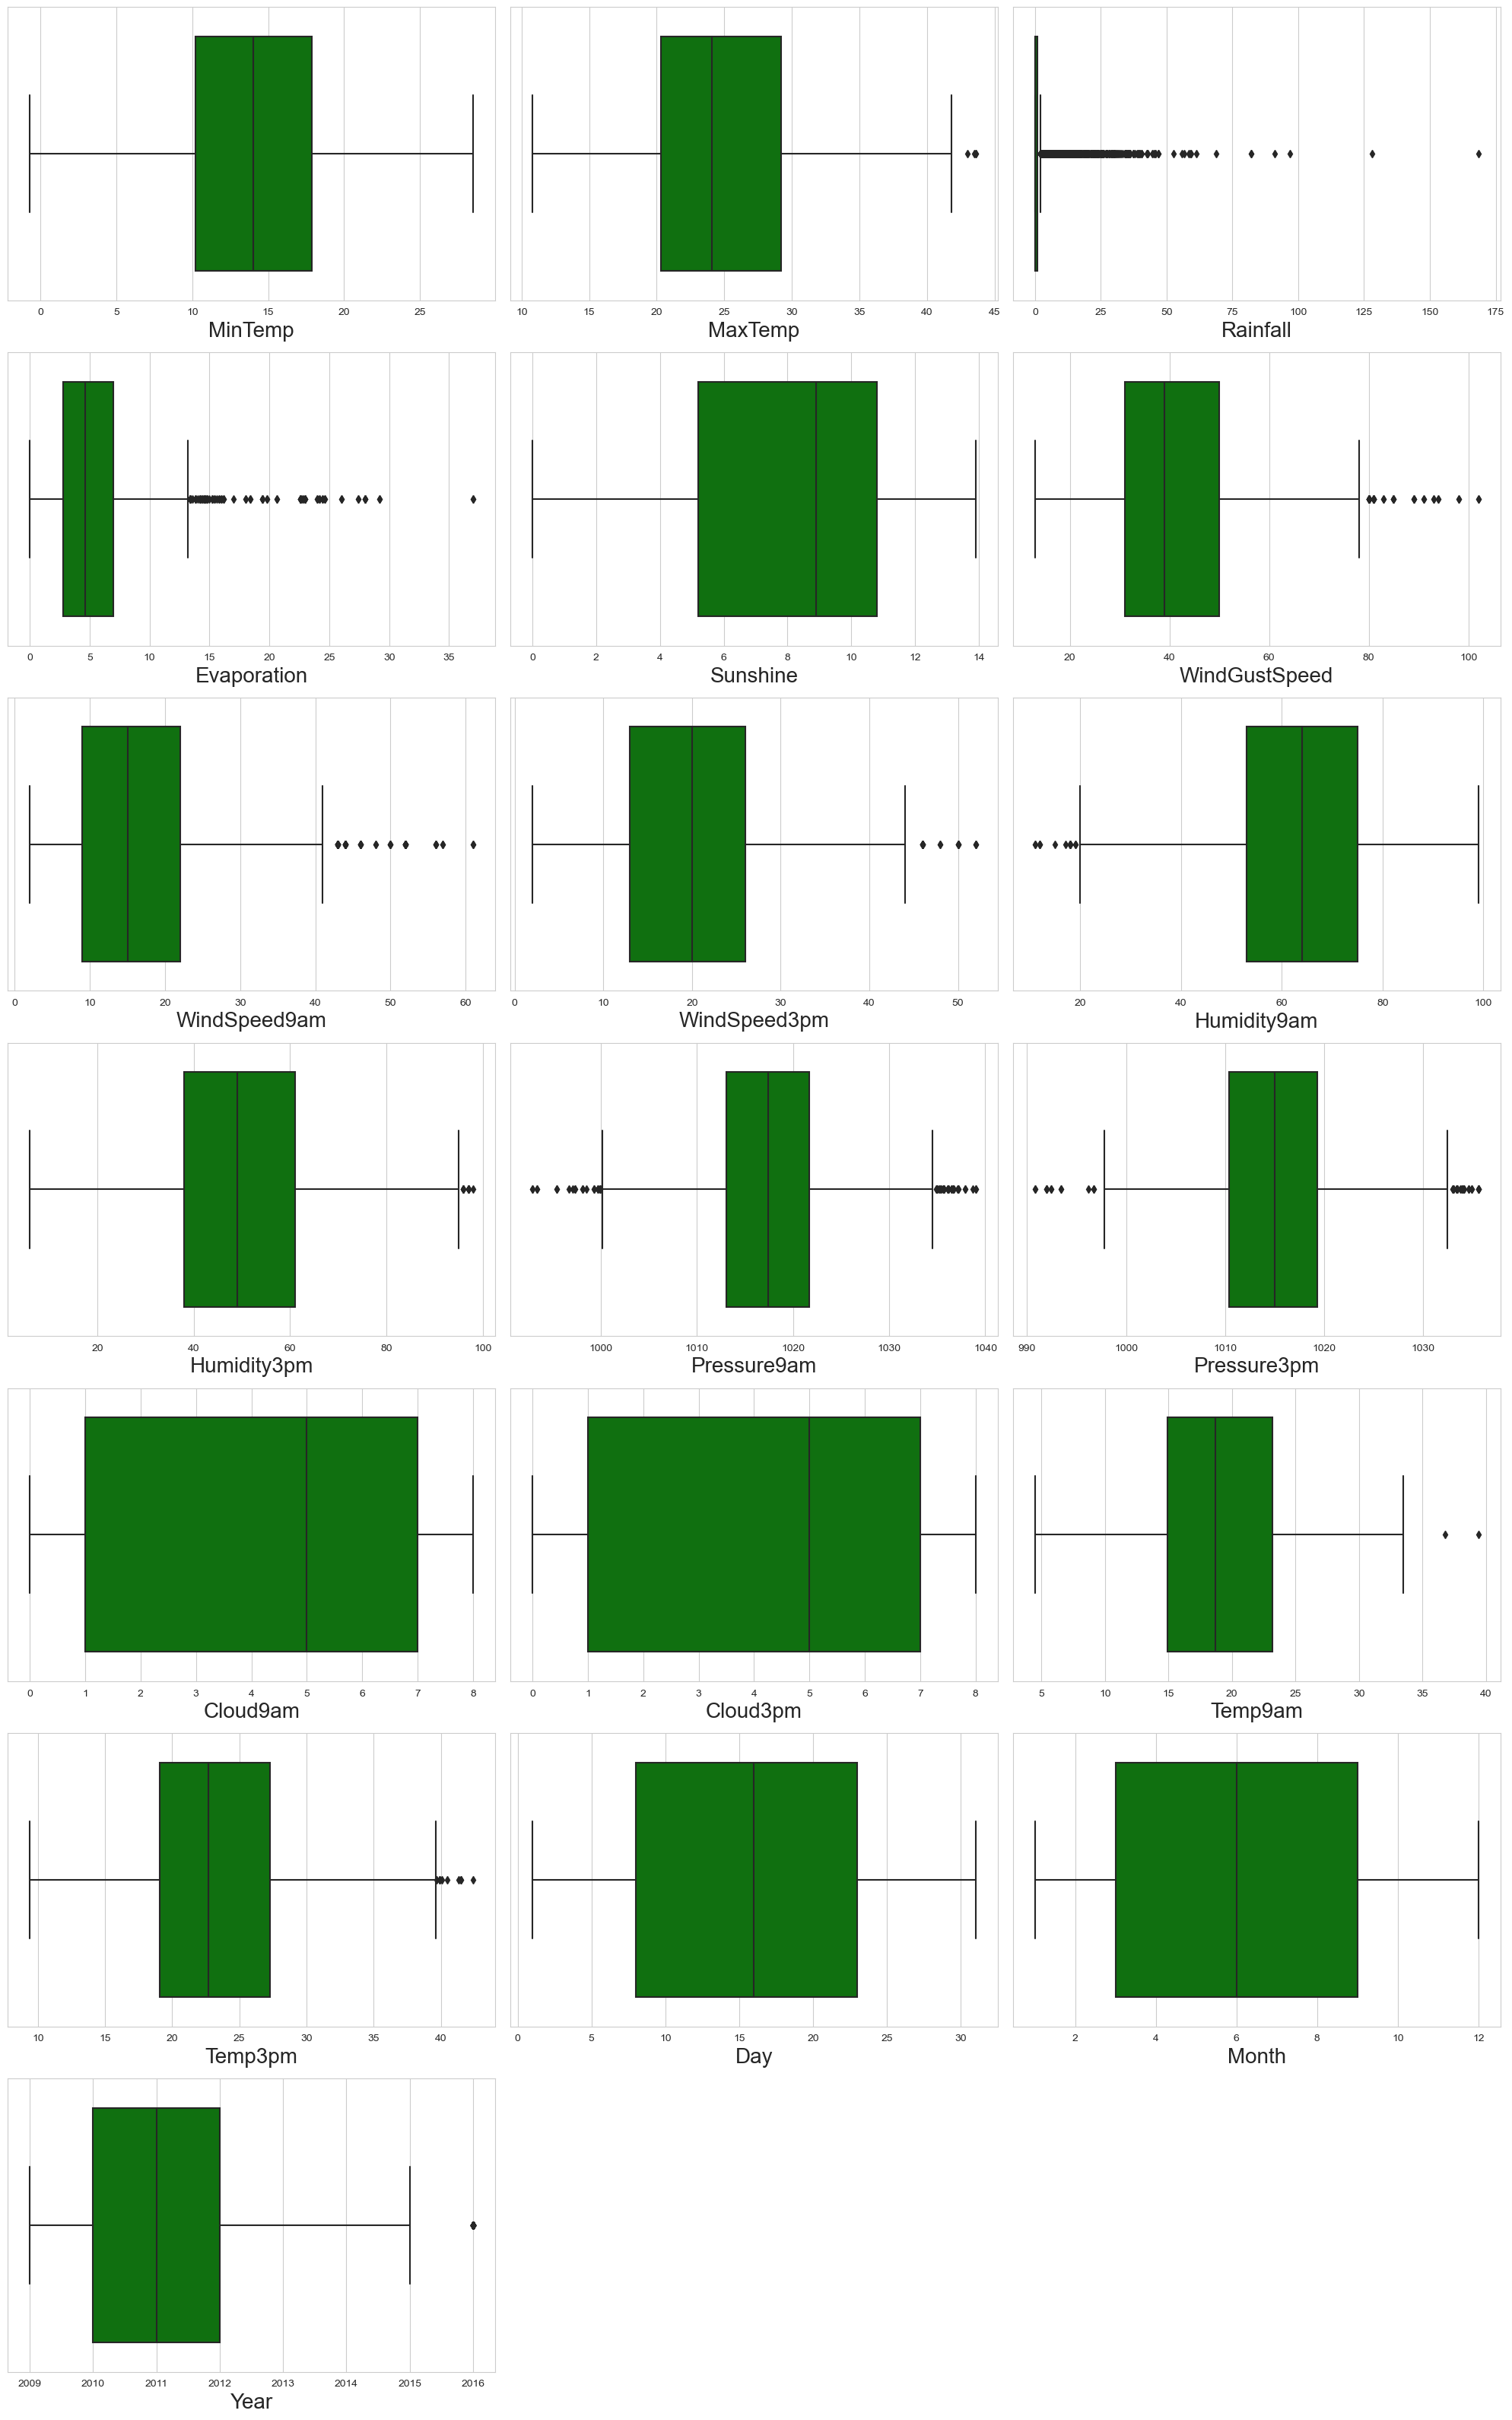

In [54]:
plt.figure(figsize=(20, 45), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(include=['float64', 'int64']):
    if plotnumber <= 29:
        ax = plt.subplot(10, 3, plotnumber)
        sns.boxplot(x=df[column], color='g') 
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

## Outliers removal using Zscore method

In [58]:
from scipy.stats import zscore

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

z = np.abs(zscore(df[numeric_columns]))

threshold = 3

df_filtered = df[(z < threshold).all(axis=1)]


## 2. Skewness of features

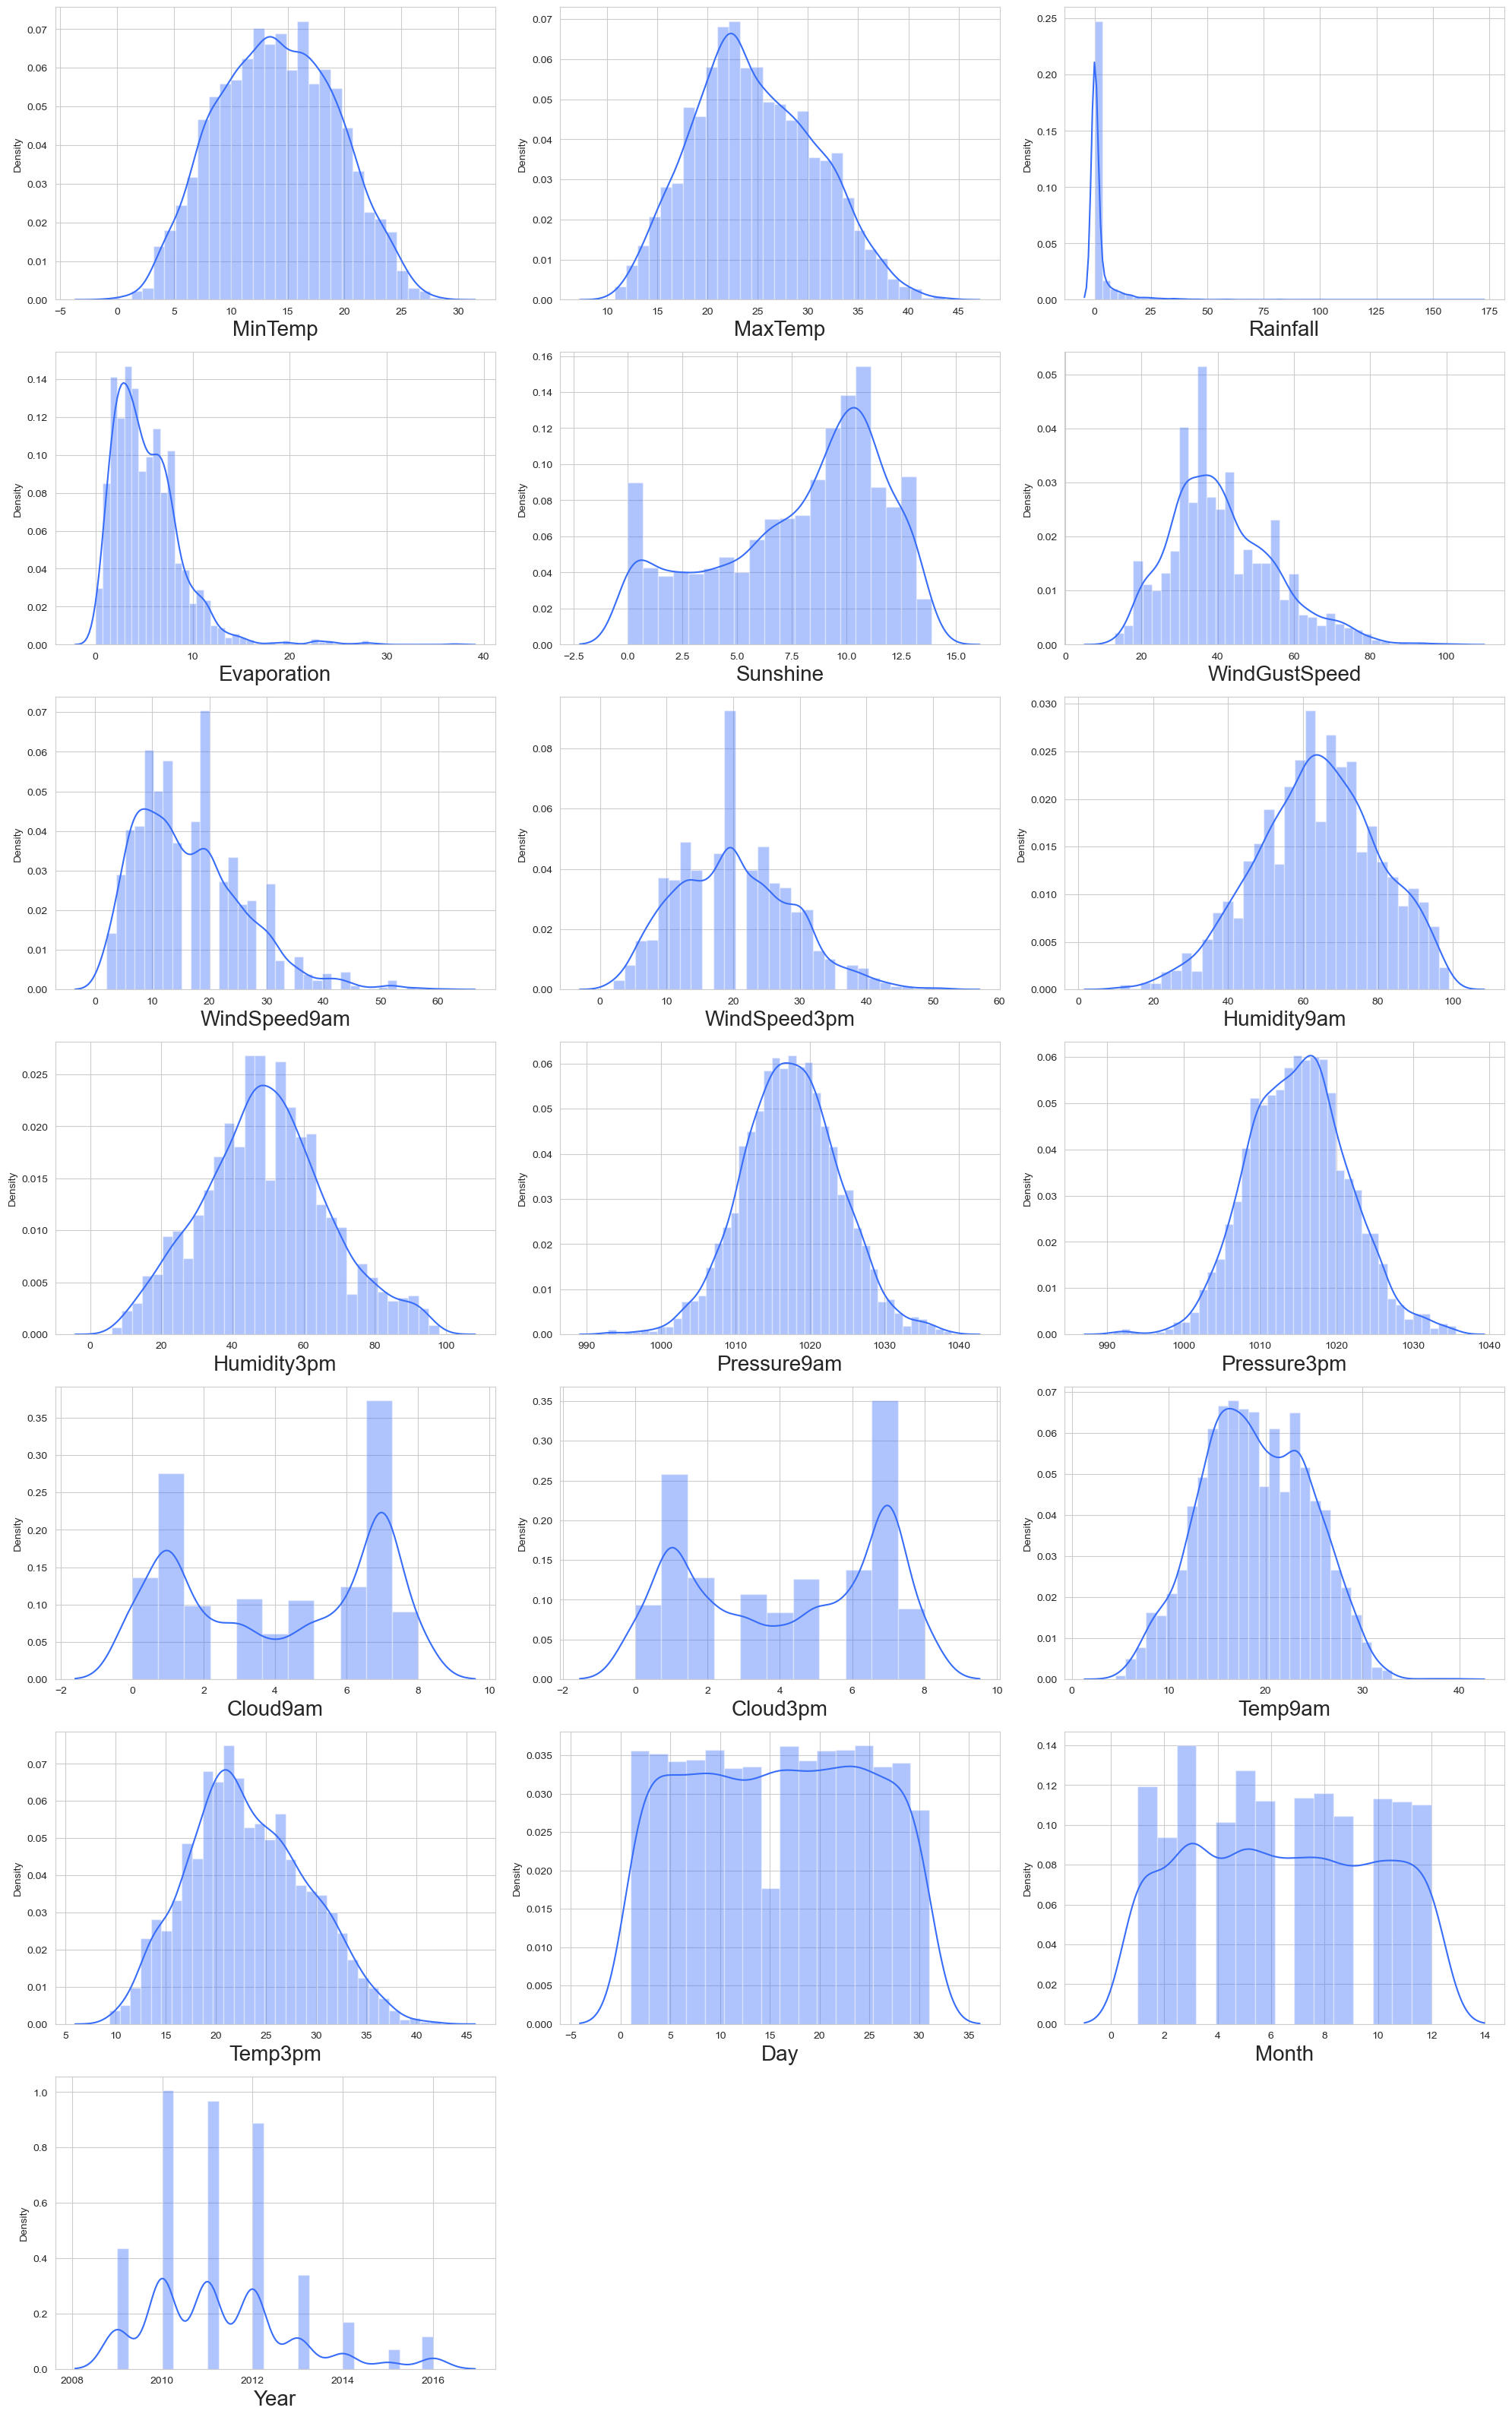

In [60]:
plt.figure(figsize=(20, 45), facecolor='white')
plotnum = 1

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    if plotnum <= 29:
        plt.subplot(10, 3, plotnum)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=20)
        plotnum += 1

plt.tight_layout()
plt.show()

### Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

## We also going to ignore sknewness in target feature.

In [64]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

skewness = numeric_columns.skew()


## 3. Corrleation

In [67]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()


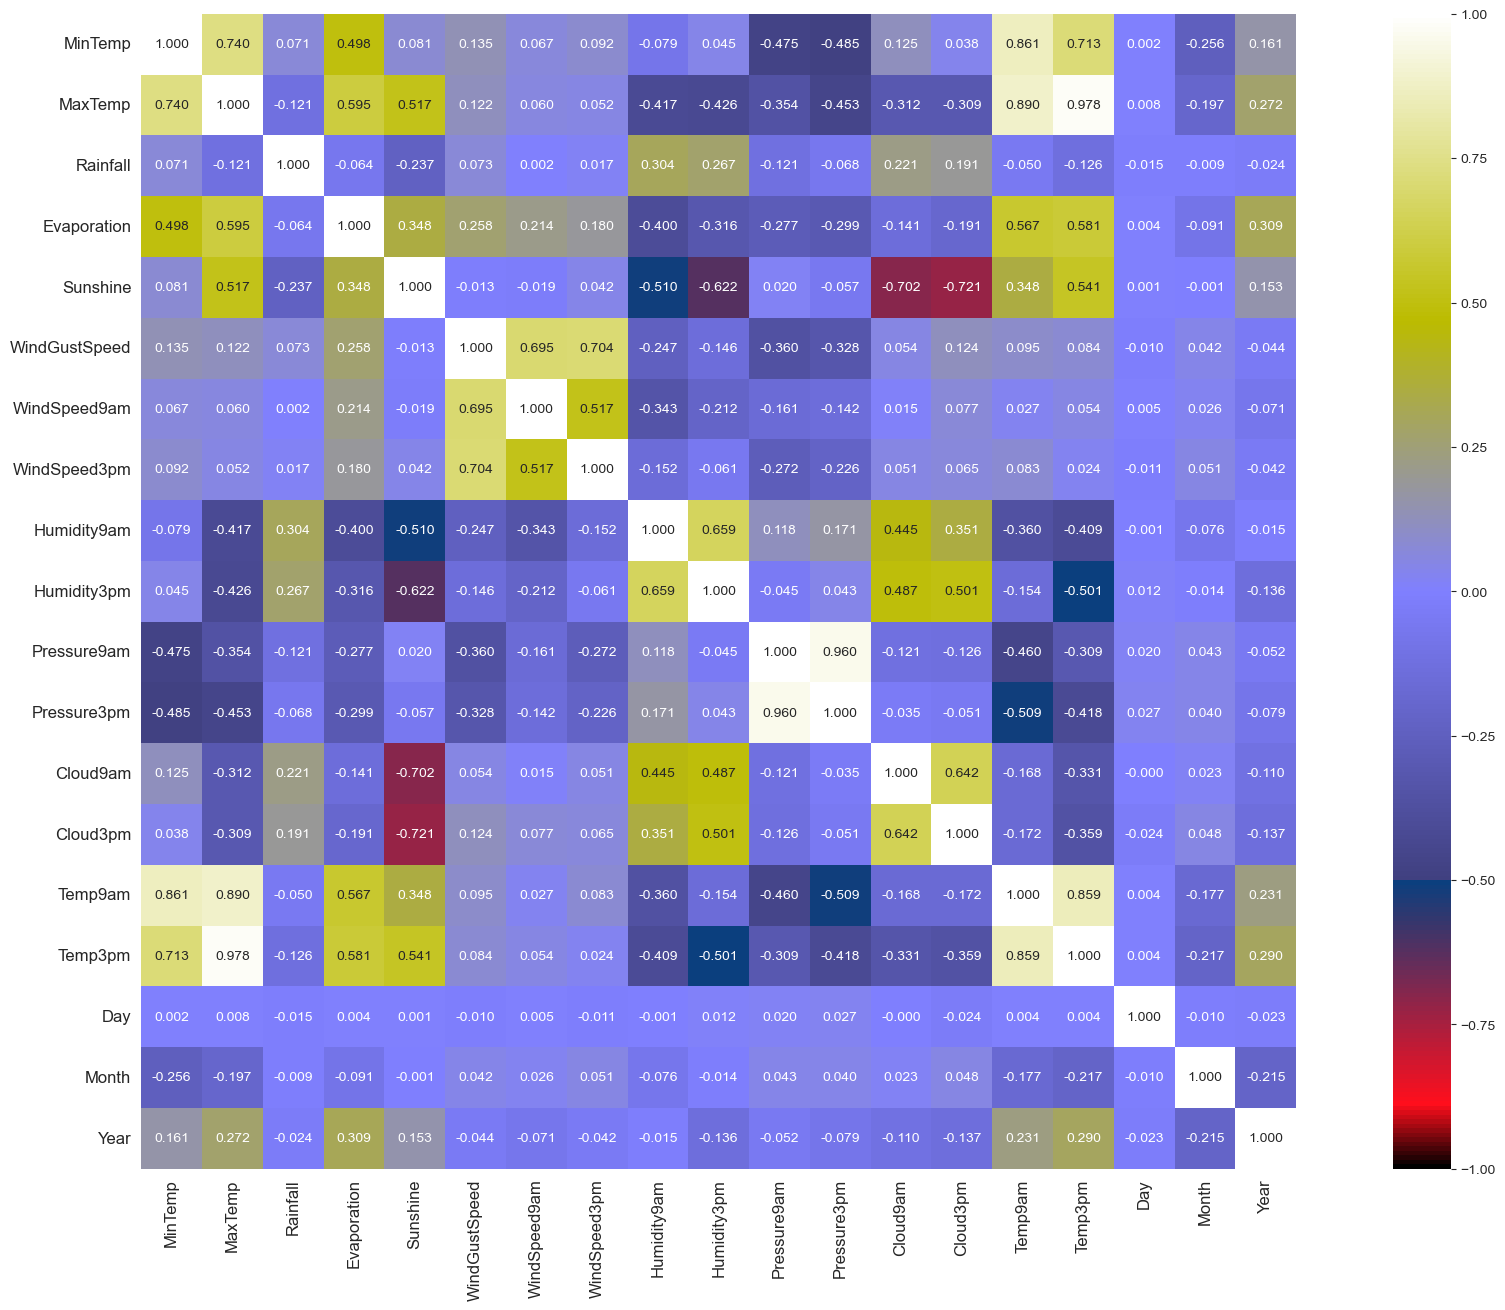

In [70]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(25, 15))
sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size': 10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Machine Learning Model Building 

### Standard Scaling

In [82]:
X = df.drop(['MaxTemp'], axis =1)
Y = df['MaxTemp']

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year',
                    'State', 'City']
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])



### Checking Multicollinearity between features using variance_inflation_factor

In [90]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_processed = preprocessor.fit_transform(X)

X_processed_df = pd.DataFrame(X_processed)



## PCA

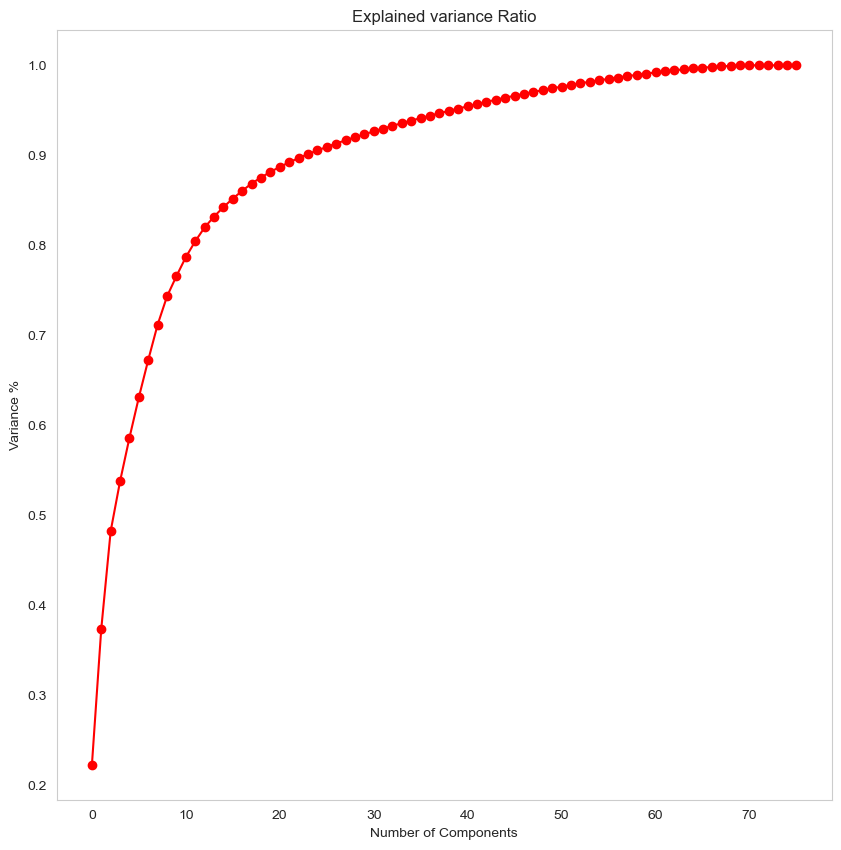

In [92]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_processed)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [93]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_processed)

In [94]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (2539, 15)
Training target vector size: (2539,)
Test feature matrix size: (1251, 15)
Test target vector size: (1251,)


## Finding best Random state

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.97841551012341 on Random_state 434


## Linear Regression Base Model

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [24.68384171 22.88554001 34.41791916 ... 14.80509949 22.86388779
 16.86730576]


Actual Wins:
 6938    23.3
6628    21.9
8365    33.3
5080    15.5
1244    27.4
        ... 
6993    40.4
8210    32.1
4810    12.9
5969    21.0
4529    16.4
Name: MaxTemp, Length: 1251, dtype: float64


In [100]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7202836827217913
Mean squared error : 0.992427242388789
Root Mean Squared Error: 0.9962064255909961


 R2 Score :
0.9736979755973484


In [101]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_processed, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -2.2921072590310896e+21


## Applying other ML Models

In [102]:
from sklearn.ensemble import BaggingRegressor

In [103]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.5786866506794569
Mean squared error : 0.7326420775379702
Root Mean Squared Error: 0.8559451369906661


 R2 Score :
0.9805829898870673


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.4989568345323802
Mean squared error : 0.6532032925659482
Root Mean Squared Error: 0.808209930999334


 R2 Score :
0.9826883340086392


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.7509992006394883
Mean squared error : 1.49466826538769
Root Mean Squared Error: 1.2225662621664684


 R2 Score :
0.9603872208349808


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.1317371026843843
Mean squared error : 1.9298428053227863
Root Mean Squared Error: 1.3891878221906446


 R2 Score :
0.9488539105025932


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.6363800741038191
Mean squared error : 0.7658197264141692
Root Mean Squared Error: 0.8751112651624188


 R2 Score :
0.9797036918457681


 Error of  XGBRegr

In [105]:
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_processed, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.9705524319607706


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.9744839298288548


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.9430098175559902


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.92569089622167


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.9680375469173752


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_l

## Hyper Parameter Tuning : GridSearchCV


In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [108]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.305 total time=   0.1s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.312 total time=   0.1s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.296 total time=   0.1s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=0.308 total time=   0.1s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[C

In [ ]:
GCV.best_params_

## Final Regression Saving Model

In [ ]:
import joblib
joblib.dump(Final_mod,'Weather_Rainfall_Forcast_Final.pkl')